 ### 1. Importing the libraries

In [268]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

### 1. Missing data Exploration

##### a. Determining missing data for each variable, and plot as horizontal bar with seabon

In [269]:
df=sns.load_dataset('titanic') # Getting the titanic dataset
df.head() # Checking the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


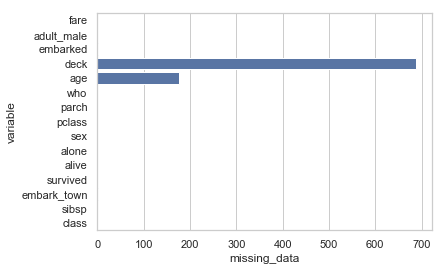

In [270]:
# Using all the variables in the dataset

# getting the sum of missing data in the columns
for col in df.columns:
    bar[col]=sum(pd.isna(df[col])) 
# Creating a dataframe for the missing data
missing=pd.DataFrame({"variable":bar.keys(),"missing_data":bar.values()})
# Plotting the data  in horizontal bar
sns.barplot(x="missing_data", y="variable", data=missing, label="Missing data", color="b")

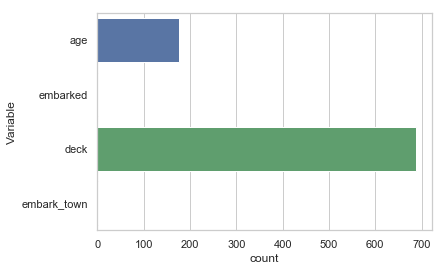

In [271]:
# Since most of the variables don't have missing values, it can work better plotting with only the variables with missing values
# Getting the missing values variables
missing_values = df.isnull().sum(axis=0)
missing_values = missing_values[missing_values > 0]
missing_values=pd.DataFrame(missing_values)
missing_values.columns = ['count']
missing_values.index.names = ['Variable']
missing_values['Variable'] = missing_values.index
#plotting with just the variables missing values
sns.barplot(x = 'count', y = 'Variable', data=missing_values)

##### b. Amount of Missing data for each passenger, separated by gender. Plotting on a vertical bar plot

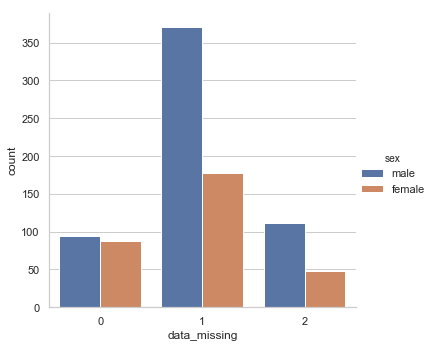

In [272]:
missing_values_2 = df.isnull().sum(axis=1) #number of missing data for each passenger
df2=df.copy() #Copying to not change the original dataframe
df2['data_missing']=missing_values_2 # Creating column with number of missing data for each passenger
# plotting the data, separating by gender
sns.catplot(x="data_missing",kind="count", hue="sex", data=df2)

##### c. Putting both axes on the same figure

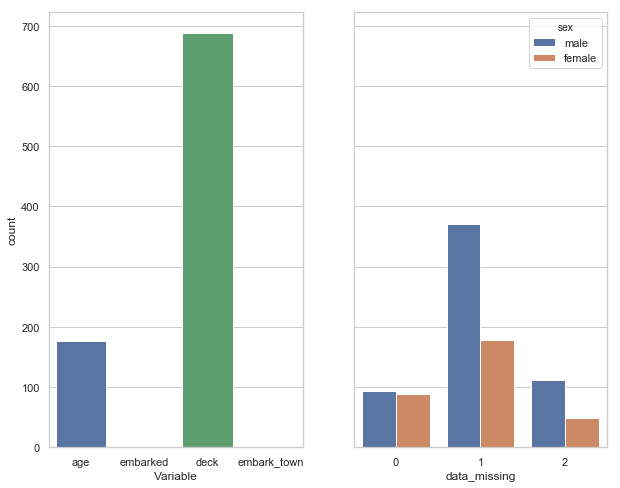

In [273]:
# Creating the figure (2 columns for the 2 plots)
fig, axs = plt.subplots(1,2,figsize=(10,8),sharey=True)

# 1st plot - exchanging x and y axes to match the second plot
sns.barplot(x = 'Variable', y = 'count', data=missing_values, ax=axs[0])
# 2nd plot
sns.catplot(x="data_missing", kind="count", hue="sex", data=df2, ax=axs[1])
axs[1].set_ylabel("")
plt.close(2)

### 3. Survival Exploration

##### a. Creating pairplot for all numerical variables in the dataset (dropna for age)

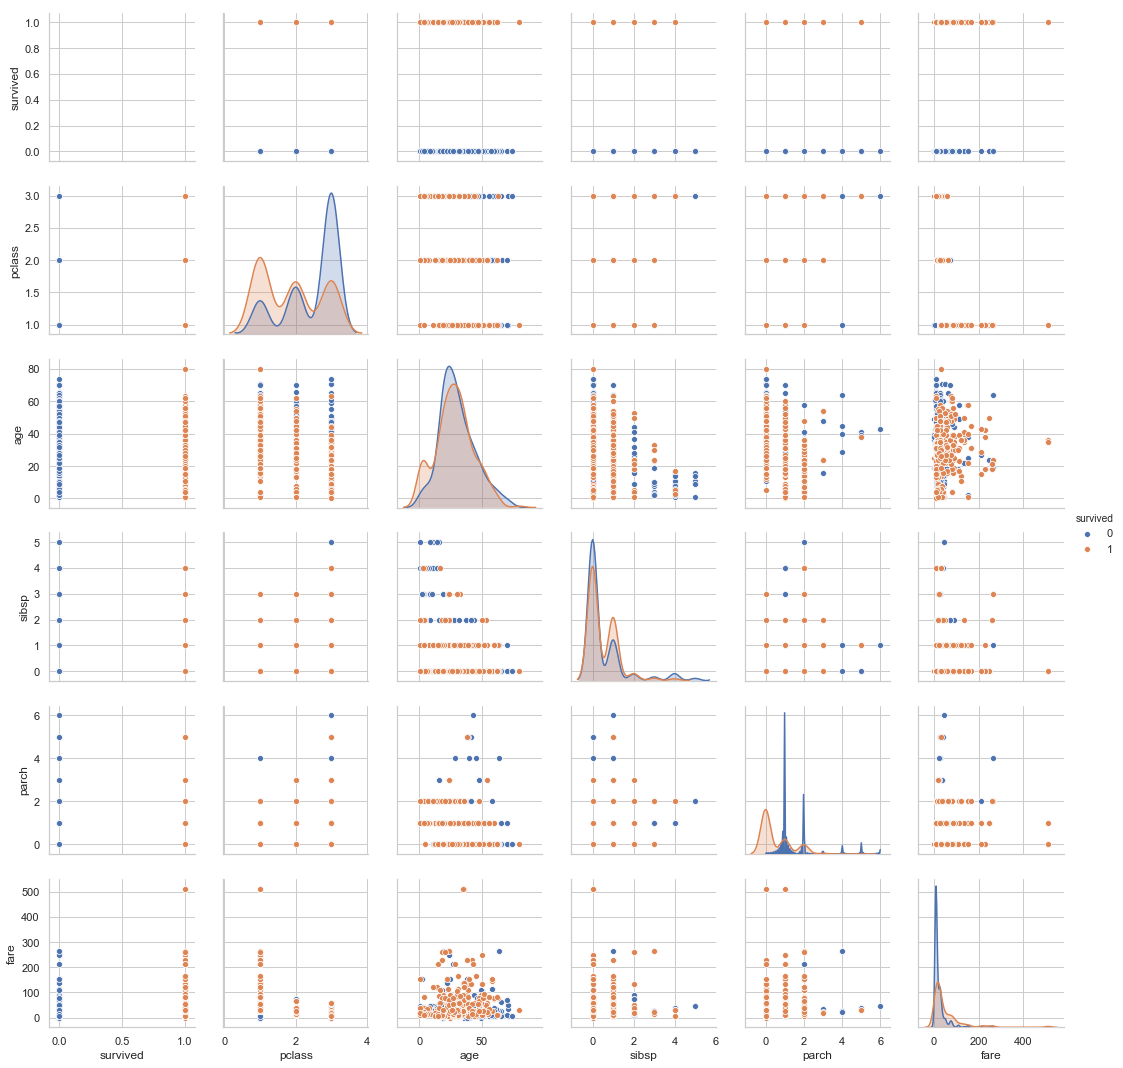

In [274]:
#Get numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
sns.pairplot(data=df.select_dtypes(include=numerics).dropna(subset=['age']),hue="survived")

##### b. Bar plot for survial and age grouping (child 0-17, younger_adult 18-21, adult 22-49, older_adult 50 and above)

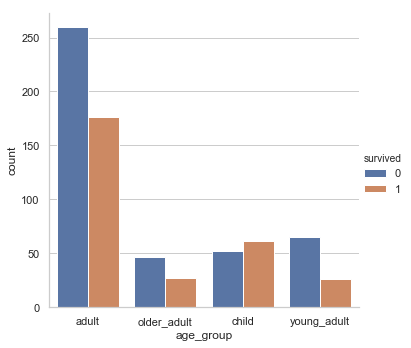

In [275]:
# Getting the data, dropping rows with missing values in age
df3=df.copy().dropna(subset=['age'])
#initializing age group column
initial=['' for i in range(df3.count()[0])]
df3['age_group']=initial
df3.loc[df3.age < 50, 'age_group']='adult'
df3.loc[df3.age < 22, 'age_group']='young_adult'
df3.loc[df3.age < 18, 'age_group']='child'
df3.loc[df3.age >= 50, 'age_group']='older_adult'

#Plotting 
sns.catplot(x="age_group",kind="count", hue="survived", data=df3)

##### c. Other things

i) Relationship between age of each passenger and class (first, second, third), colored according to survival

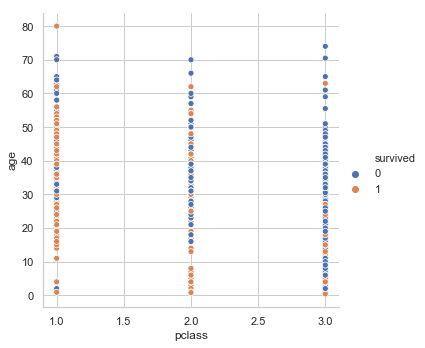

In [276]:
# plotting how many people survived/not in each class with their age
sns.relplot(data=df.dropna(subset=['age']),x="pclass",y="age",hue='survived',kind="scatter")

ii) Number of passengers embarked at Southampton alone, separated by gender and class

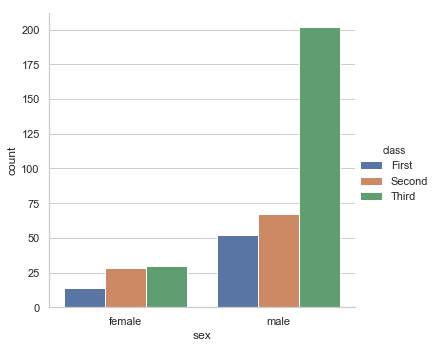

In [277]:
#Number of male and female Embarked at Southampton alone, segreggated according to class
sns.catplot(x="sex",kind="count", hue="class", data=df[(df.embark_town=='Southampton') & (df.alone==True)])

iii) Distribution of fares

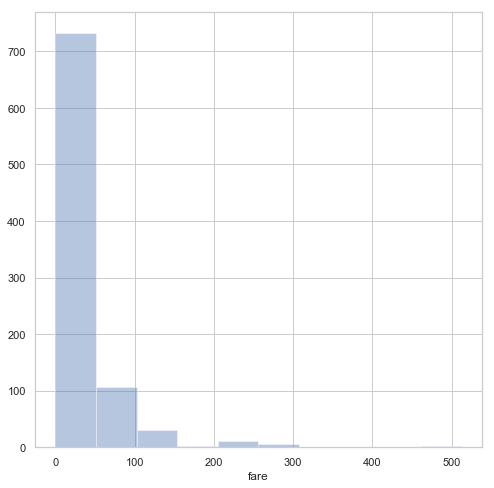

In [278]:
fig, ax1 = plt.subplots(1,1,figsize=(8,8))
sns.distplot(df.fare, kde=False,bins=10, ax=ax1)

iv) Number of survivors/not per each class

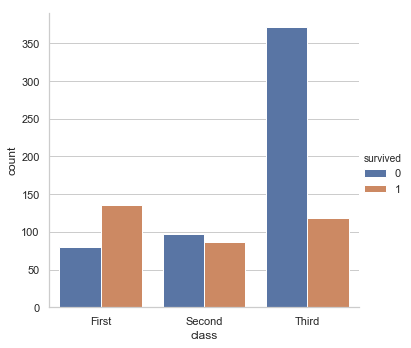

In [279]:
sns.catplot(x="class",kind="count", hue="survived", data=df)